In [1]:
from google.colab import files
uploaded = files.upload()

In [2]:
import pandas as pd
import numpy as np

In [3]:
def criar_dataset(nome_arquivo):
    dataset = []
    with open(nome_arquivo, 'r') as arquivo:
        linhas = arquivo.readlines()
        for linha in linhas:
            dado = linha.strip()  # Remove caracteres de quebra de linha e espaços em branco
            dataset.append(dado)
    return dataset

In [4]:
X_train = criar_dataset('/content/treino_sinc_dan.txt')
X_test =  criar_dataset('/content/teste_sinc_dan.txt')

y_train = criar_dataset('/content/alvotr_sinc_dan.txt')
y_test = criar_dataset('/content/alvote_sinc_dan.txt')

In [5]:
def transform_items_to_lists(input_list):
    transformed_list = [[item] for item in input_list]
    return transformed_list

In [6]:
X_train = np.array(transform_items_to_lists(X_train)).astype(float)
X_test = np.array(transform_items_to_lists(X_test)).astype(float)
y_train = np.array(transform_items_to_lists(y_train)).astype(float)
y_test = np.array(transform_items_to_lists(y_test)).astype(float)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases randomly
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward pass through the network
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.z2  # Linear activation for regression

        return self.a2

    def backward(self, X, y):
        # Backward pass to update weights and biases
        m = X.shape[0]

        # Compute gradients
        dZ2 = 2 * (self.a2 - y)
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dZ1 = np.dot(dZ2, self.W2.T) * (1 - np.power(self.a1, 2))  # Derivative of tanh
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            # Forward and backward propagation for each epoch
            y_pred = self.forward(X)
            self.backward(X, y)

    def predict(self, X):
        # Predict outputs for new input data
        return self.forward(X)

# Create MLP and train
mlp = MLP(input_size=1, hidden_size=110, output_size=1, learning_rate=0.01)

num_iterations = 50


# Make predictions on the test data
y_train_pred_all = np.zeros((X_train.shape[0], num_iterations))
y_test_pred_all = np.zeros((X_test.shape[0], num_iterations))

train_mse_all = np.zeros(num_iterations)
test_mse_all = np.zeros(num_iterations)
train_mse_std_all = np.zeros(num_iterations)
test_mse_std_all = np.zeros(num_iterations)

for i in range(num_iterations):

    mlp.train(X_train, y_train, epochs=10)


    # Predict outputs for the training data
    y_train_pred = mlp.predict(X_train)

    # Predict outputs for the test data
    y_test_pred = mlp.predict(X_test)

    # Store predictions
    y_train_pred_all[:, i] = y_train_pred.flatten()
    y_test_pred_all[:, i] = y_test_pred.flatten()

    # Calculate MSE
    train_mse = np.mean((y_train_pred - y_train.reshape(-1, 1)) ** 2, axis=0)
    test_mse = np.mean((y_test_pred - y_test.reshape(-1, 1)) ** 2, axis=0)

    # Calculate standard deviation of MSE
    train_mse_std = np.std((y_train_pred - y_train.reshape(-1, 1)) ** 2, axis=0)
    test_mse_std = np.std((y_test_pred - y_test.reshape(-1, 1)) ** 2, axis=0)

    # Store MSE and standard deviation for each iteration
    train_mse_all[i] = train_mse
    test_mse_all[i] = test_mse
    train_mse_std_all[i] = train_mse_std
    test_mse_std_all[i] = test_mse_std

# Calculate mean and standard deviation of predictions
y_train_pred_mean = np.mean(y_train_pred_all, axis=1)
y_train_pred_std = np.std(y_train_pred_all, axis=1)
y_test_pred_mean = np.mean(y_test_pred_all, axis=1)
y_test_pred_std = np.std(y_test_pred_all, axis=1)

# Calculate mean of MSE and standard deviation of MSE
train_mse_mean = np.mean(train_mse_all)
test_mse_mean = np.mean(test_mse_all)
train_mse_std_mean = np.mean(train_mse_std_all)
test_mse_std_mean = np.mean(test_mse_std_all)

# Create a table
results_table = pd.DataFrame({
    'Training MSE mean': train_mse_mean,
    'Test MSE mean': test_mse_mean,
    'Training MSE Std': train_mse_std_mean,
    'Test MSE Std': test_mse_std_mean
}, index=['Mean'])

In [8]:
results_table

,Training MSE mean,Test MSE mean,Training MSE Std,Test MSE Std
Mean,0.021844,0.021851,0.0232,0.023199


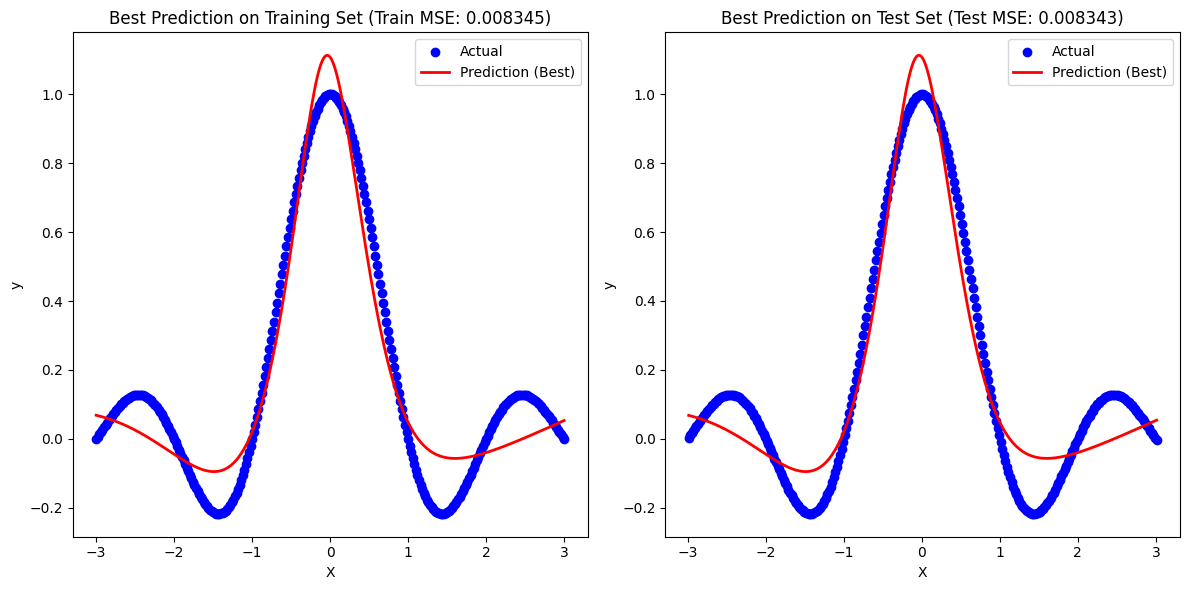

In [9]:
import matplotlib.pyplot as plt


# Find the iteration with the lowest train and test MSE
best_train_iteration = np.argmin(train_mse_all)
best_train_mse = train_mse_all[best_train_iteration]
best_y_train_pred = y_train_pred_all[:, best_train_iteration]

best_test_iteration = np.argmin(test_mse_all)
best_test_mse = test_mse_all[best_test_iteration]
best_y_test_pred = y_test_pred_all[:, best_test_iteration]

# Plot the best predictions with the lowest train and test MSE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, best_y_train_pred, color='red', linewidth=2, label='Prediction (Best)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Prediction on Training Set (Train MSE: {:.6f})'.format(best_train_mse))
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, best_y_test_pred, color='red', linewidth=2, label='Prediction (Best)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Prediction on Test Set (Test MSE: {:.6f})'.format(best_test_mse))
plt.legend()

plt.tight_layout()
plt.show()
